# <font color='navy'>Data source</font>

https://archive.ics.uci.edu/ml/datasets/Online+Retail

# <font color='navy'>Importing Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# <font color='navy'>Loadng the data</font>

In [2]:
data=pd.read_csv('data.csv',encoding = 'unicode_escape')

# <font color='navy'>Exploratory Data Analysis (EDA)</font>

In [3]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [4]:
data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [7]:
print('Data Size : ',data.shape)

Data Size :  (541909, 8)


In [8]:
data['InvoiceDate']=pd.DatetimeIndex(data['InvoiceDate'])
print('Data is considered between the dates' , data.InvoiceDate.min(), ' and ',data.InvoiceDate.max())

Data is considered between the dates 2010-12-01 08:26:00  and  2011-12-09 12:50:00


In [9]:
print('Number of different products  : ',data.StockCode.unique().shape[0])
print('Total number of customers : ',len(data.CustomerID.value_counts()))
print('Transactions took place in ',len(data.Country.value_counts()), 'countries')

Number of different products  :  4070
Total number of customers :  4372
Transactions took place in  38 countries


In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### From the above cell, we can observe that there is no description for 1454 rows

#### Desription of the product does not add any value to the model, so lets drop the Description feature.  

In [11]:
data.drop('Description',axis=1,inplace=True)

In [12]:
data.Country.value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [13]:
data.Country.value_counts().tail()

Lithuania         35
Brazil            32
Czech Republic    30
Bahrain           19
Saudi Arabia      10
Name: Country, dtype: int64

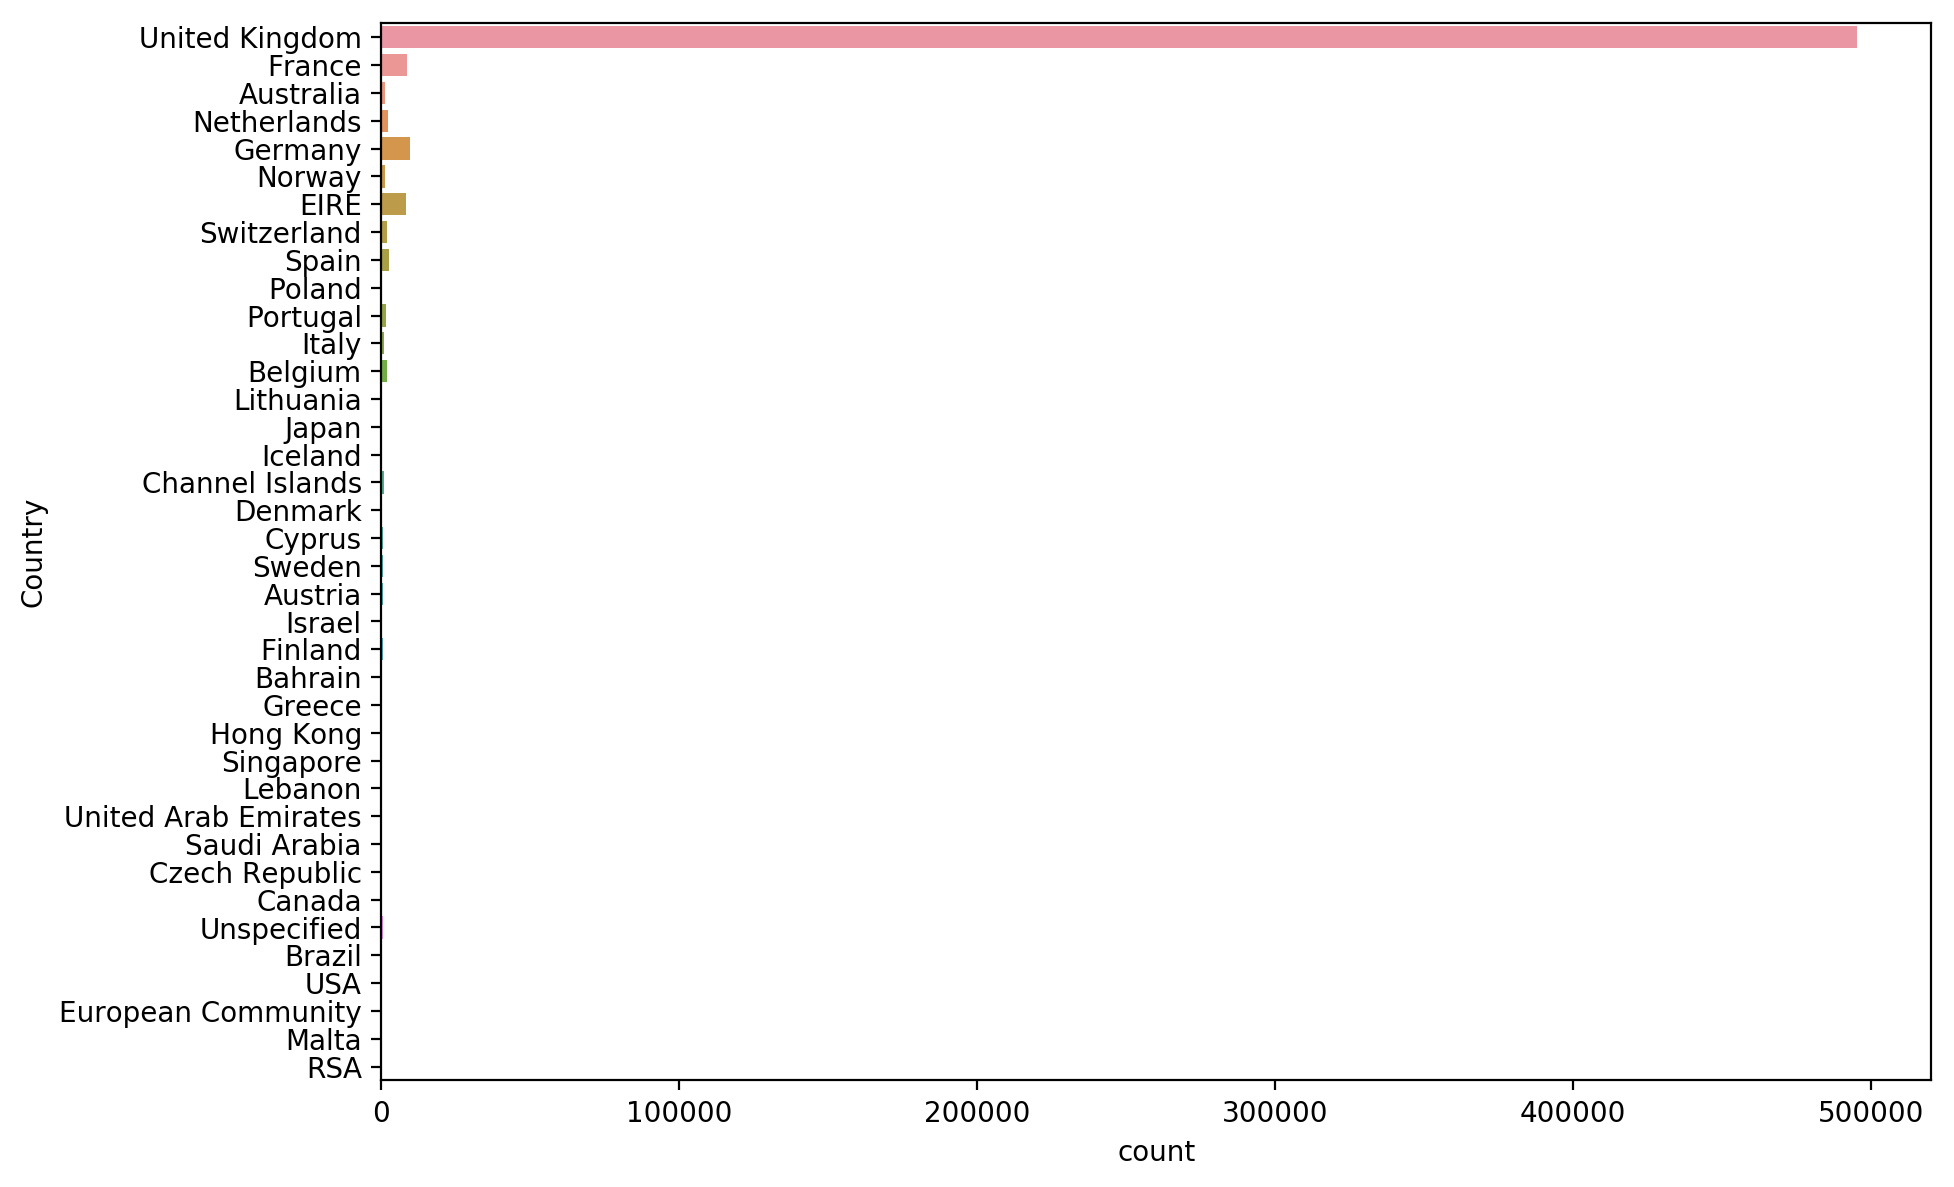

In [14]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,7),dpi=100)
sns.countplot(y='Country', data=data)

#### From the above cell, we can observe that highest number of transactions are made from United Kingdom, germany and France

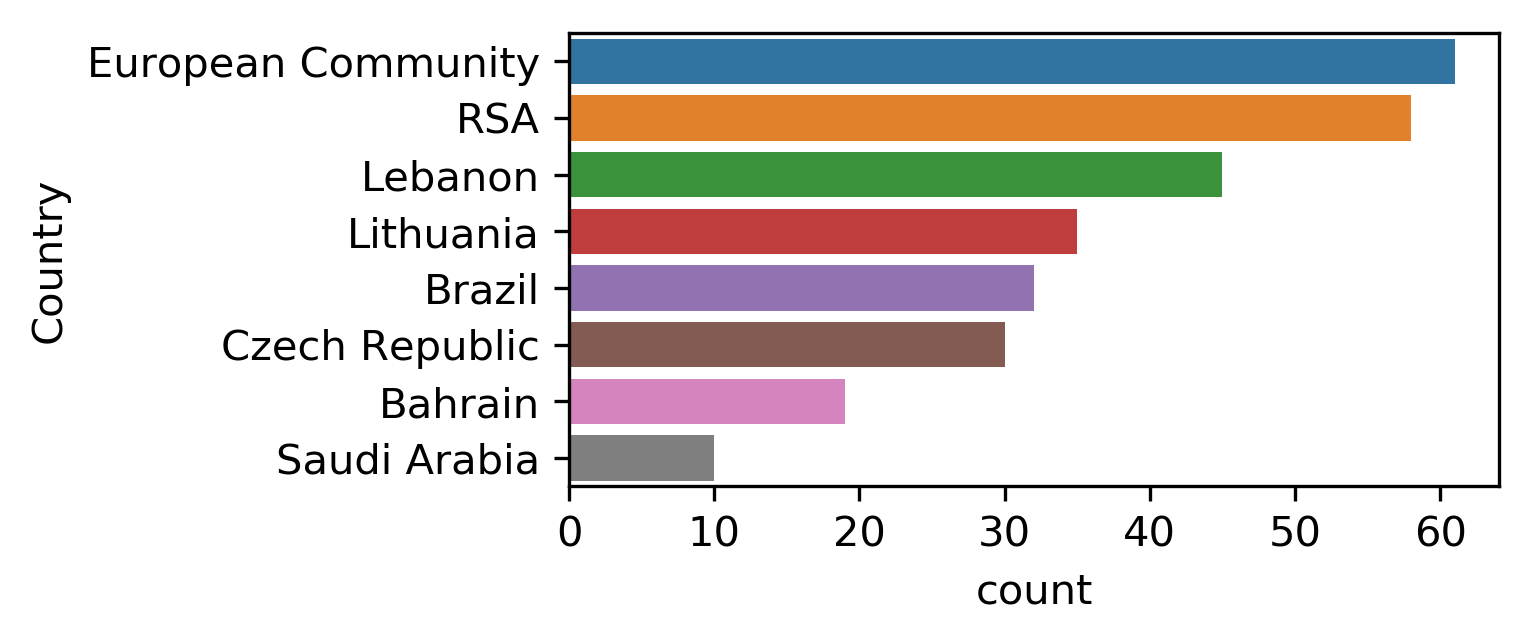

In [15]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(4,2),dpi=150)
sns.countplot(y='Country', data=data,order=pd.value_counts(data.Country).iloc[30:].index)

#### From the above count plot, we can see that the least number of transactions are made by the customers from Saudi Arabia, bahrain and Czech republic 

In [16]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### There are 135080 transactions wihtou the customerID. Null values in this feature constitute 25% of the data. That means transactions with null values in CUstomerId can not be dropped. Instead, these transactions can be combined to form a new group. Lets name this group as 2.

In [17]:
data.fillna(2,inplace=True)

In [18]:
data.shape

(541909, 7)

C:\Users\Hemanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


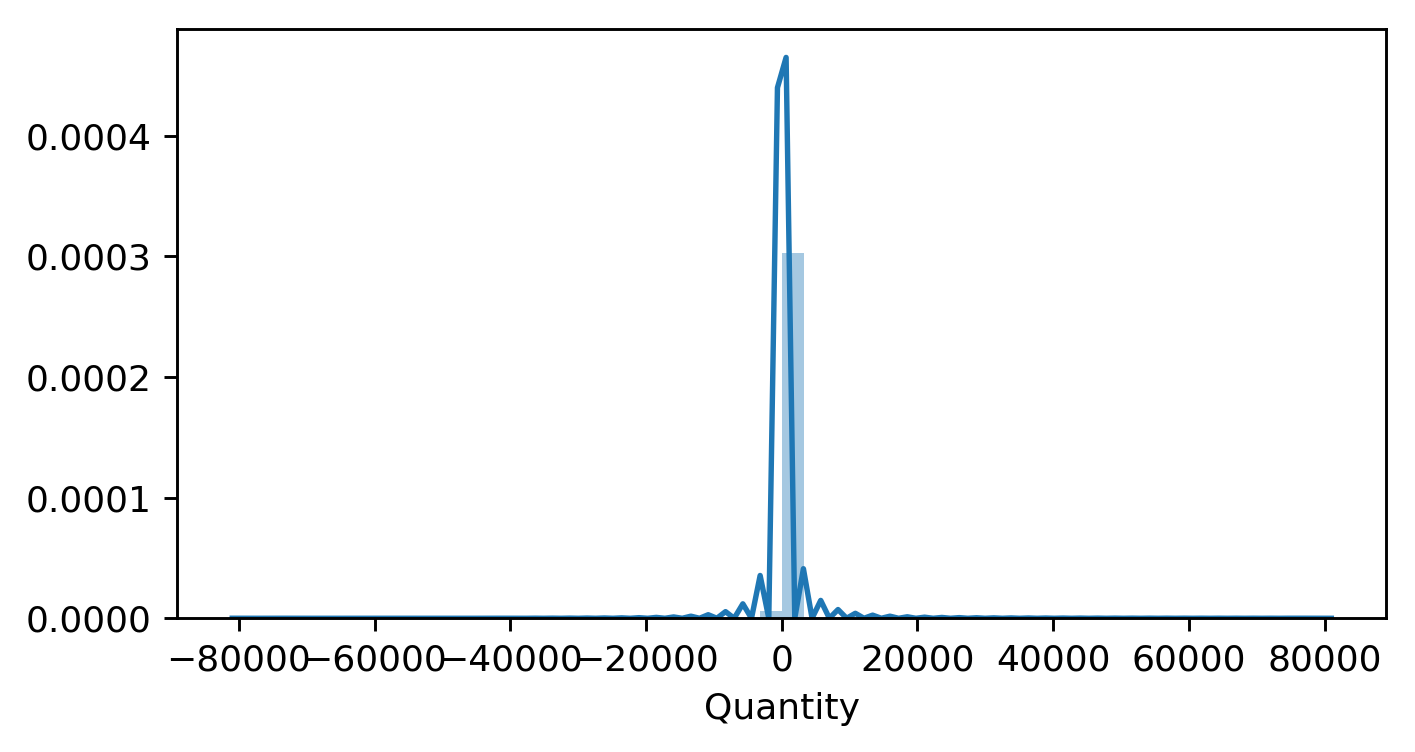

In [19]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(6,3),dpi=130)
sns.distplot(data.Quantity)

#### From the above distribution plot, we can observe that there are few negative values in the quanitity feature. Generaly, quantity should be greater than 0 when the transaction is made. Quantity is negative which denotes the cancelled transactions.

In [20]:
print('Transactions with negative quantity : ',data[data.Quantity<0].shape[0])
data[data.Quantity<0].head(10)

Transactions with negative quantity :  10624


InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
141   C536379         D        -1 2010-12-01 09:41:00      27.50     14527.0   
154   C536383    35004C        -1 2010-12-01 09:49:00       4.65     15311.0   
235   C536391     22556       -12 2010-12-01 10:24:00       1.65     17548.0   
236   C536391     21984       -24 2010-12-01 10:24:00       0.29     17548.0   
237   C536391     21983       -24 2010-12-01 10:24:00       0.29     17548.0   
238   C536391     21980       -24 2010-12-01 10:24:00       0.29     17548.0   
239   C536391     21484       -12 2010-12-01 10:24:00       3.45     17548.0   
240   C536391     22557       -12 2010-12-01 10:24:00       1.65     17548.0   
241   C536391     22553       -24 2010-12-01 10:24:00       1.65     17548.0   
939   C536506     22960        -6 2010-12-01 12:38:00       4.25     17897.0   

            Country  
141  United Kingdom  
154  United Kingdom  
235  United Kingdom  
236  United Kingdom  
237  United Kingdom  
238  United Kingdom  
239  United Kingdom  
240  United Kingdom  
241  United Kingdom  
939  United Kingdom

#### We can observe that the transactions with negative quanity have 'C' in Invoice Number. Then this means that the transaction has been cancelled. Lets not consider the transactions that were cancelled. There are transactions where Unit price is zero. Practically, UnitPrice can not be there. But in this data, UnitPrice is zero for few tranasctions because price may not be available. 

In [21]:
data = data[data.Quantity>0]
data=data[data.UnitPrice>0]

# <font color='navy'>Feature Engineering</font>

### <font color='navy'>Customer dataframe</font>

#### Lets create a dataframe with customerIDs' and add new features Recency, Frequency and Cost of trnsactions made bye each customer. 

In [22]:
data.CustomerID=data.CustomerID.astype('int64')
cust_df = pd.DataFrame(data.CustomerID.unique(), columns=['CustomerID'])
print(len(cust_df ))
cust_df .head()

4339


CustomerID
0       17850
1       13047
2       12583
3       13748
4       15100

### <font color='navy'>Recency of purchase</font>

In [23]:
data['Recency'] = (pd.datetime(2011,12,11) - pd.to_datetime(data['InvoiceDate'])).dt.days
recency_df = data.groupby('CustomerID', as_index=False).agg({'Recency':'min'})
recency_df.head()

CustomerID  Recency
0           2        1
1       12346      326
2       12347        3
3       12348       76
4       12349       19

In [24]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')
print(cust_df.shape)
cust_df.head()

(4339, 2)


CustomerID  Recency
0       17850      373
1       13047       32
2       12583        3
3       13748       96
4       15100      334

### <font color='navy'>Frequencises of purchases</font>

In [25]:
frequency_df =data.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

CustomerID  Frequency
0           2     132220
1       12346          1
2       12347        182
3       12348         31
4       12349         73

In [26]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')
print(cust_df.shape)
cust_df.head()

(4339, 3)


CustomerID  Recency  Frequency
0       17850      373        297
1       13047       32        172
2       12583        3        247
3       13748       96         28
4       15100      334          3


### <font color='navy'>Purchase made by each customer</font>

In [27]:
data['Cost'] = data['Quantity'] * data['UnitPrice']
monetary_df =  data.groupby('CustomerID', as_index=False).agg({'Cost':'sum'})
monetary_df.head()

CustomerID          Cost
0           2  1.755277e+06
1       12346  7.718360e+04
2       12347  4.310000e+03
3       12348  1.797240e+03
4       12349  1.757550e+03

In [28]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')
cust_df.head()

CustomerID  Recency  Frequency     Cost
0       17850      373        297  5391.21
1       13047       32        172  3237.54
2       12583        3        247  7281.38
3       13748       96         28   948.25
4       15100      334          3   876.00

# <font color='navy'>Standardizing the data</font>

In [29]:
cust_df.head()

CustomerID  Recency  Frequency     Cost
0       17850      373        297  5391.21
1       13047       32        172  3237.54
2       12583        3        247  7281.38
3       13748       96         28   948.25
4       15100      334          3   876.00

In [30]:
cust_df=np.log(cust_df)
cust_df.head()

CustomerID   Recency  Frequency      Cost
0    9.789759  5.921578   5.693732  8.592525
1    9.476314  3.465736   5.147494  8.082569
2    9.440102  1.098612   5.509388  8.893076
3    9.528649  4.564348   3.332205  6.854618
4    9.622450  5.811141   1.098612  6.775366

cust_df.dropna()

In [31]:
cust_df.isnull().sum()

CustomerID    0
Recency       0
Frequency     0
Cost          0
dtype: int64

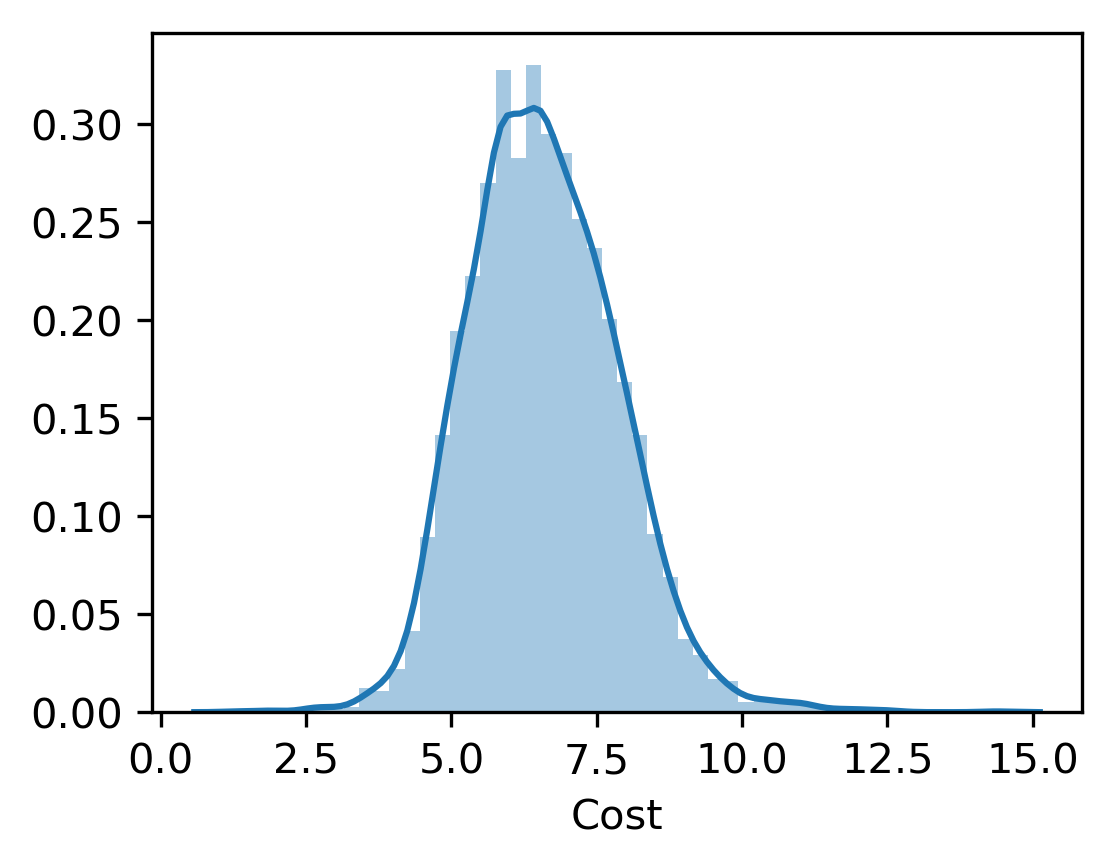

In [32]:
plt.figure(figsize=(4,3),dpi=150)
sns.distplot(cust_df .Cost)

#### The above distribution plot is made just to check if the Amount spent on the products is following the norml distribution or not. The amount spent is bit right skewed.  

# <font color='navy'>Clustering using KMeans</font>

In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters=2, n_init=10, max_iter=300)
km.fit(cust_df[['Recency', 'Frequency', 'Cost']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
cust_df['k_2'] = km.predict(cust_df[['Recency', 'Frequency', 'Cost']])
km.cluster_centers_

array([[2.78155365, 4.73896677, 7.57887905],
       [4.60792334, 2.84316997, 5.81046433]])

Text(0, 0.5, 'Cost')

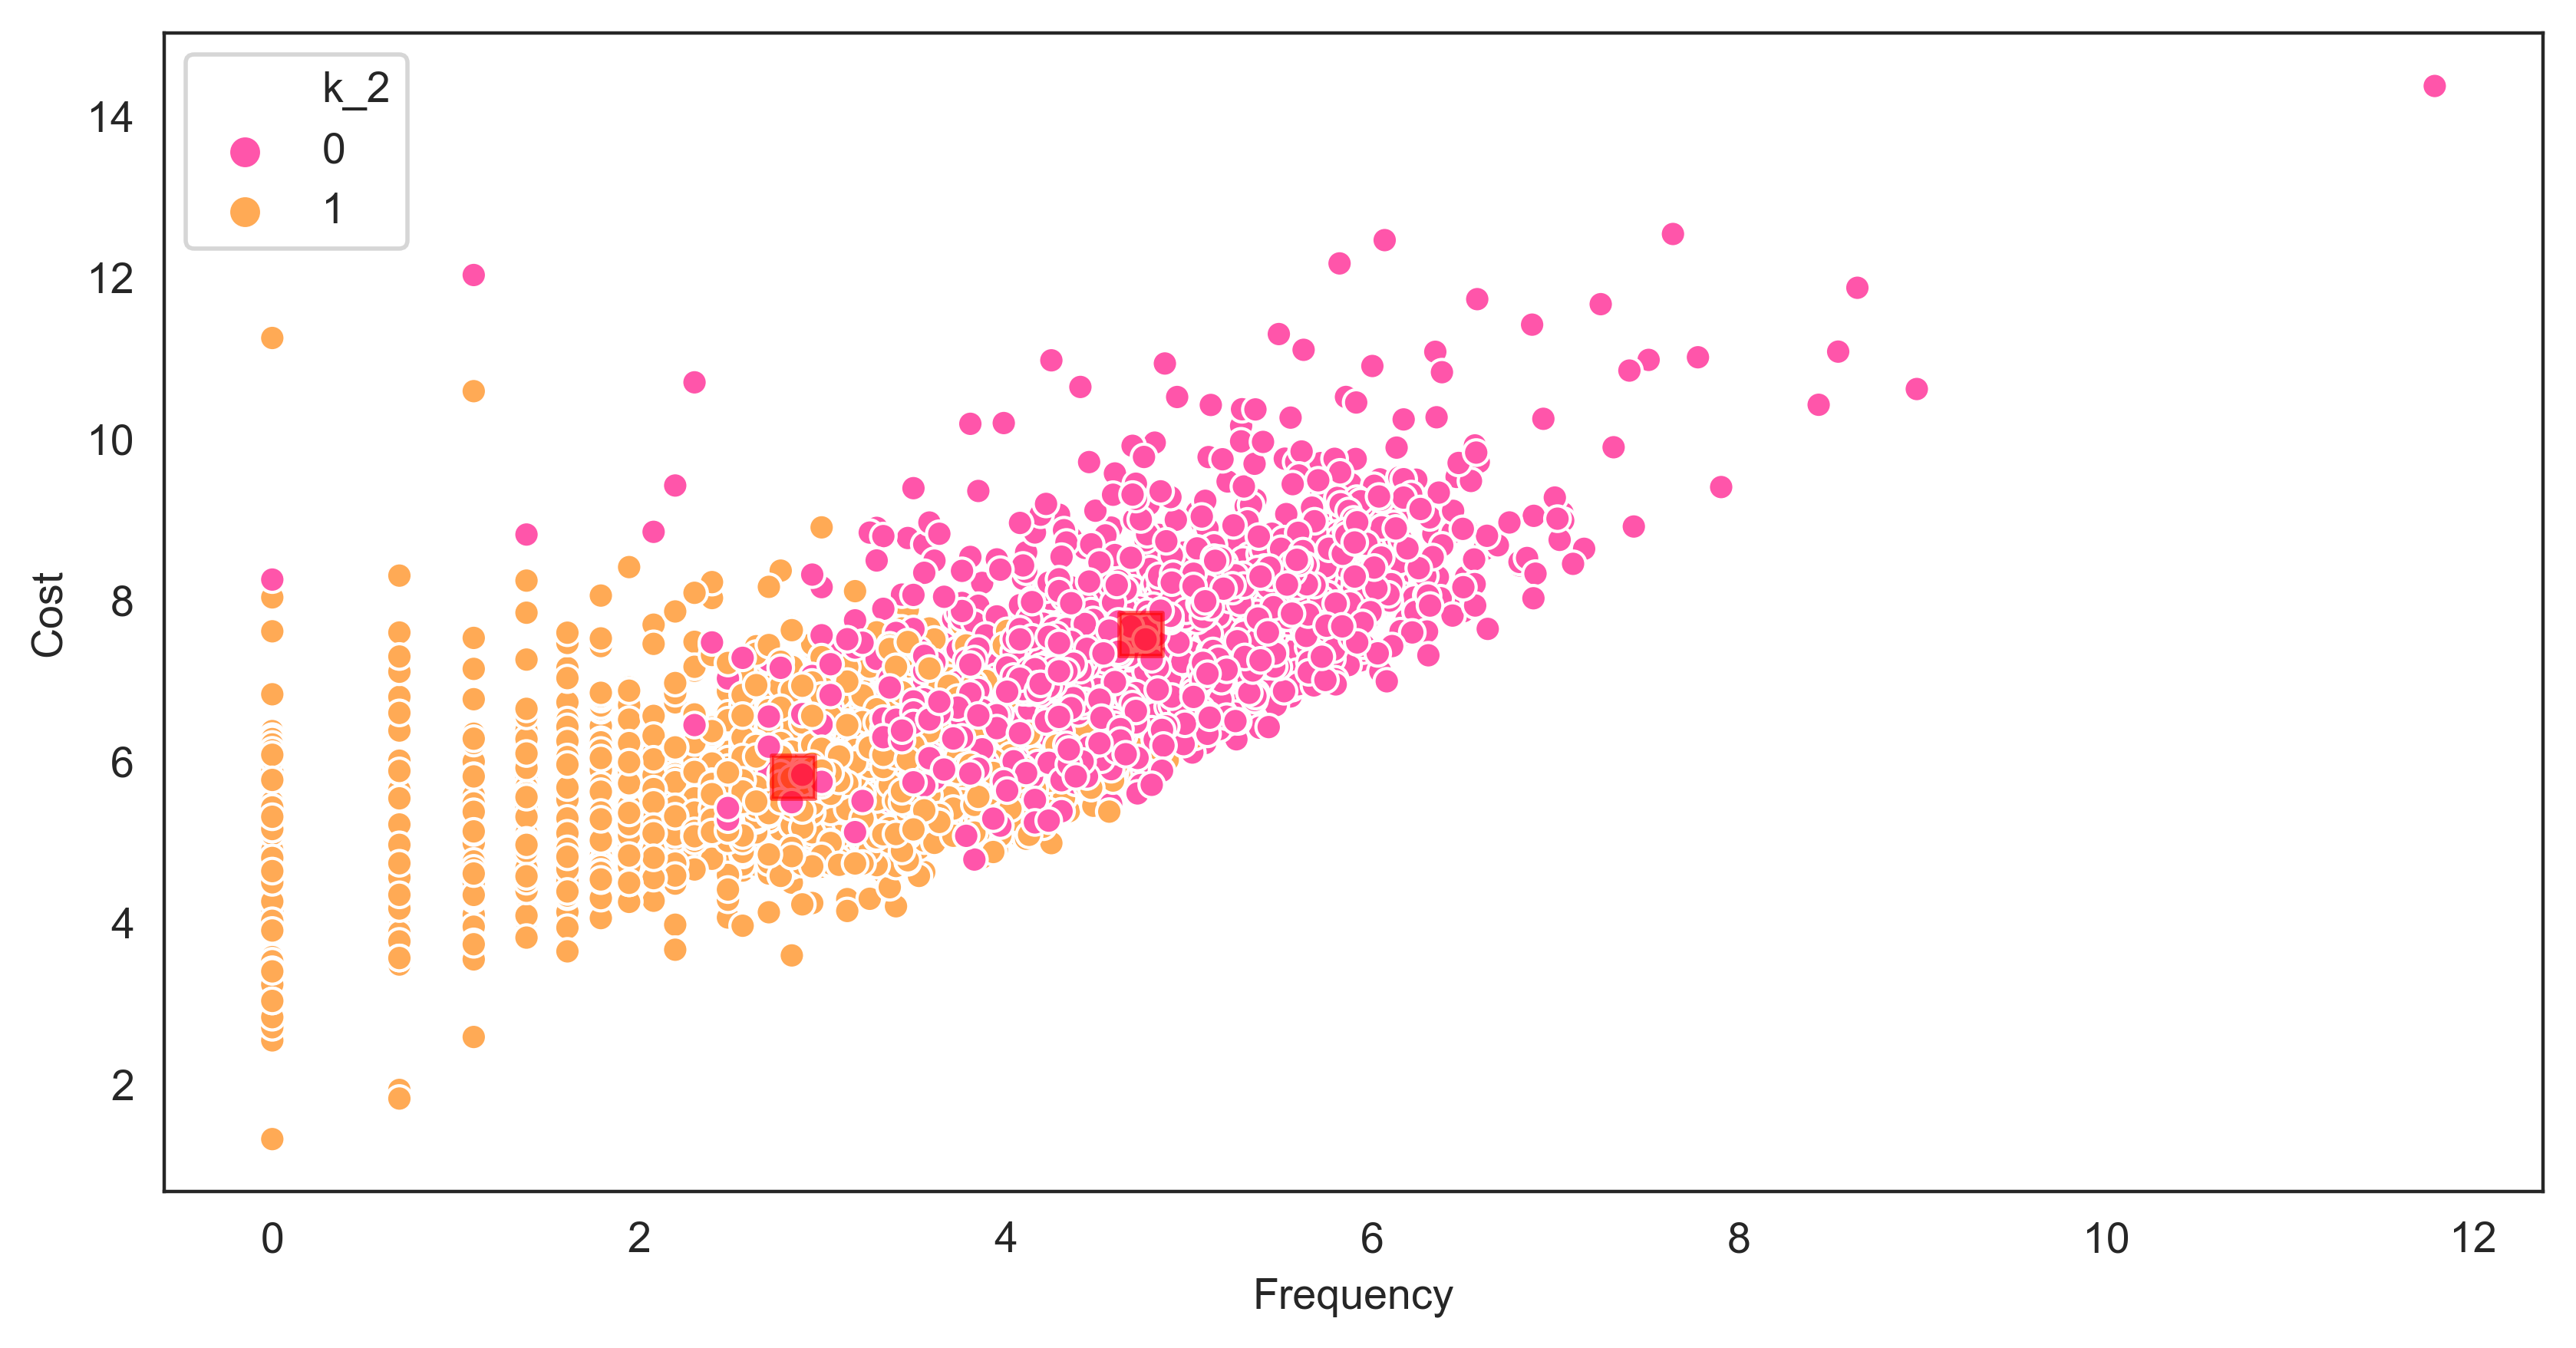

In [36]:
sns.set_style("white")
plt.figure(figsize=(10,5),frameon=True,dpi=200)
sns.scatterplot(x='Frequency', y='Cost', hue='k_2', data=cust_df, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', alpha=0.6, label='Centroids')
plt.xlabel('Frequency')
plt.ylabel('Cost')

In [37]:
cust_df.groupby('k_2').agg({'Cost':'median', 
                            'Frequency':'median', 
                            'Recency':'median'})

Cost  Frequency   Recency
k_2                               
0    7.503356   4.691348  2.890372
1    5.825631   2.995732  4.727388

### <font color='navy'>Choosing the number of clusters</font>

#### Exact number of clusters can be decided by looking at the elbow plot. Number of clusters is chosen dependign on the business case requirement. If there is no particular number of clusters required, then number of clusters are chosen such that there is sudden drop of SSE. At this number of clusters, optimum number of clusters are obtained.

In [38]:
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,11):
    km1= KMeans(n_clusters=i, n_init=10, max_iter=300)
    km1.fit(cust_df[['Recency', 'Frequency', 'Cost']])
    cust_df['k_' + str(i)] = km1.predict(cust_df[['Recency', 'Frequency', 'Cost']])
    sse_df.loc[sse_df.shape[0]] = [i, km1.inertia_]

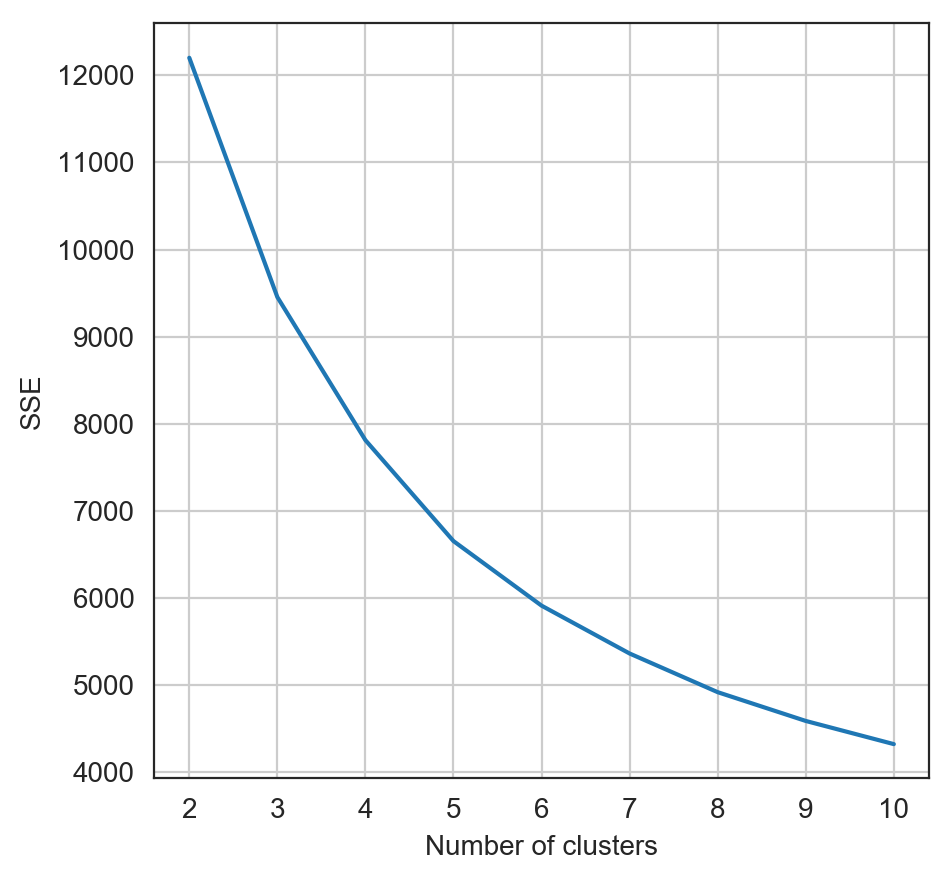

In [39]:
plt.figure(figsize=(5,5),frameon=True,dpi=100)
sns.lineplot(x='K', y='SSE', data=sse_df)
plt.xlabel('Number of clusters')
plt.grid()

# <font color='navy'>Visualising the clusters</font>

         Cost  Frequency   Recency
k_3                               
0    5.463917   2.484907  5.176150
1    7.936506   5.105945  2.197225
2    6.689052   3.951244  3.912023


Text(0, 0.5, 'Cost')

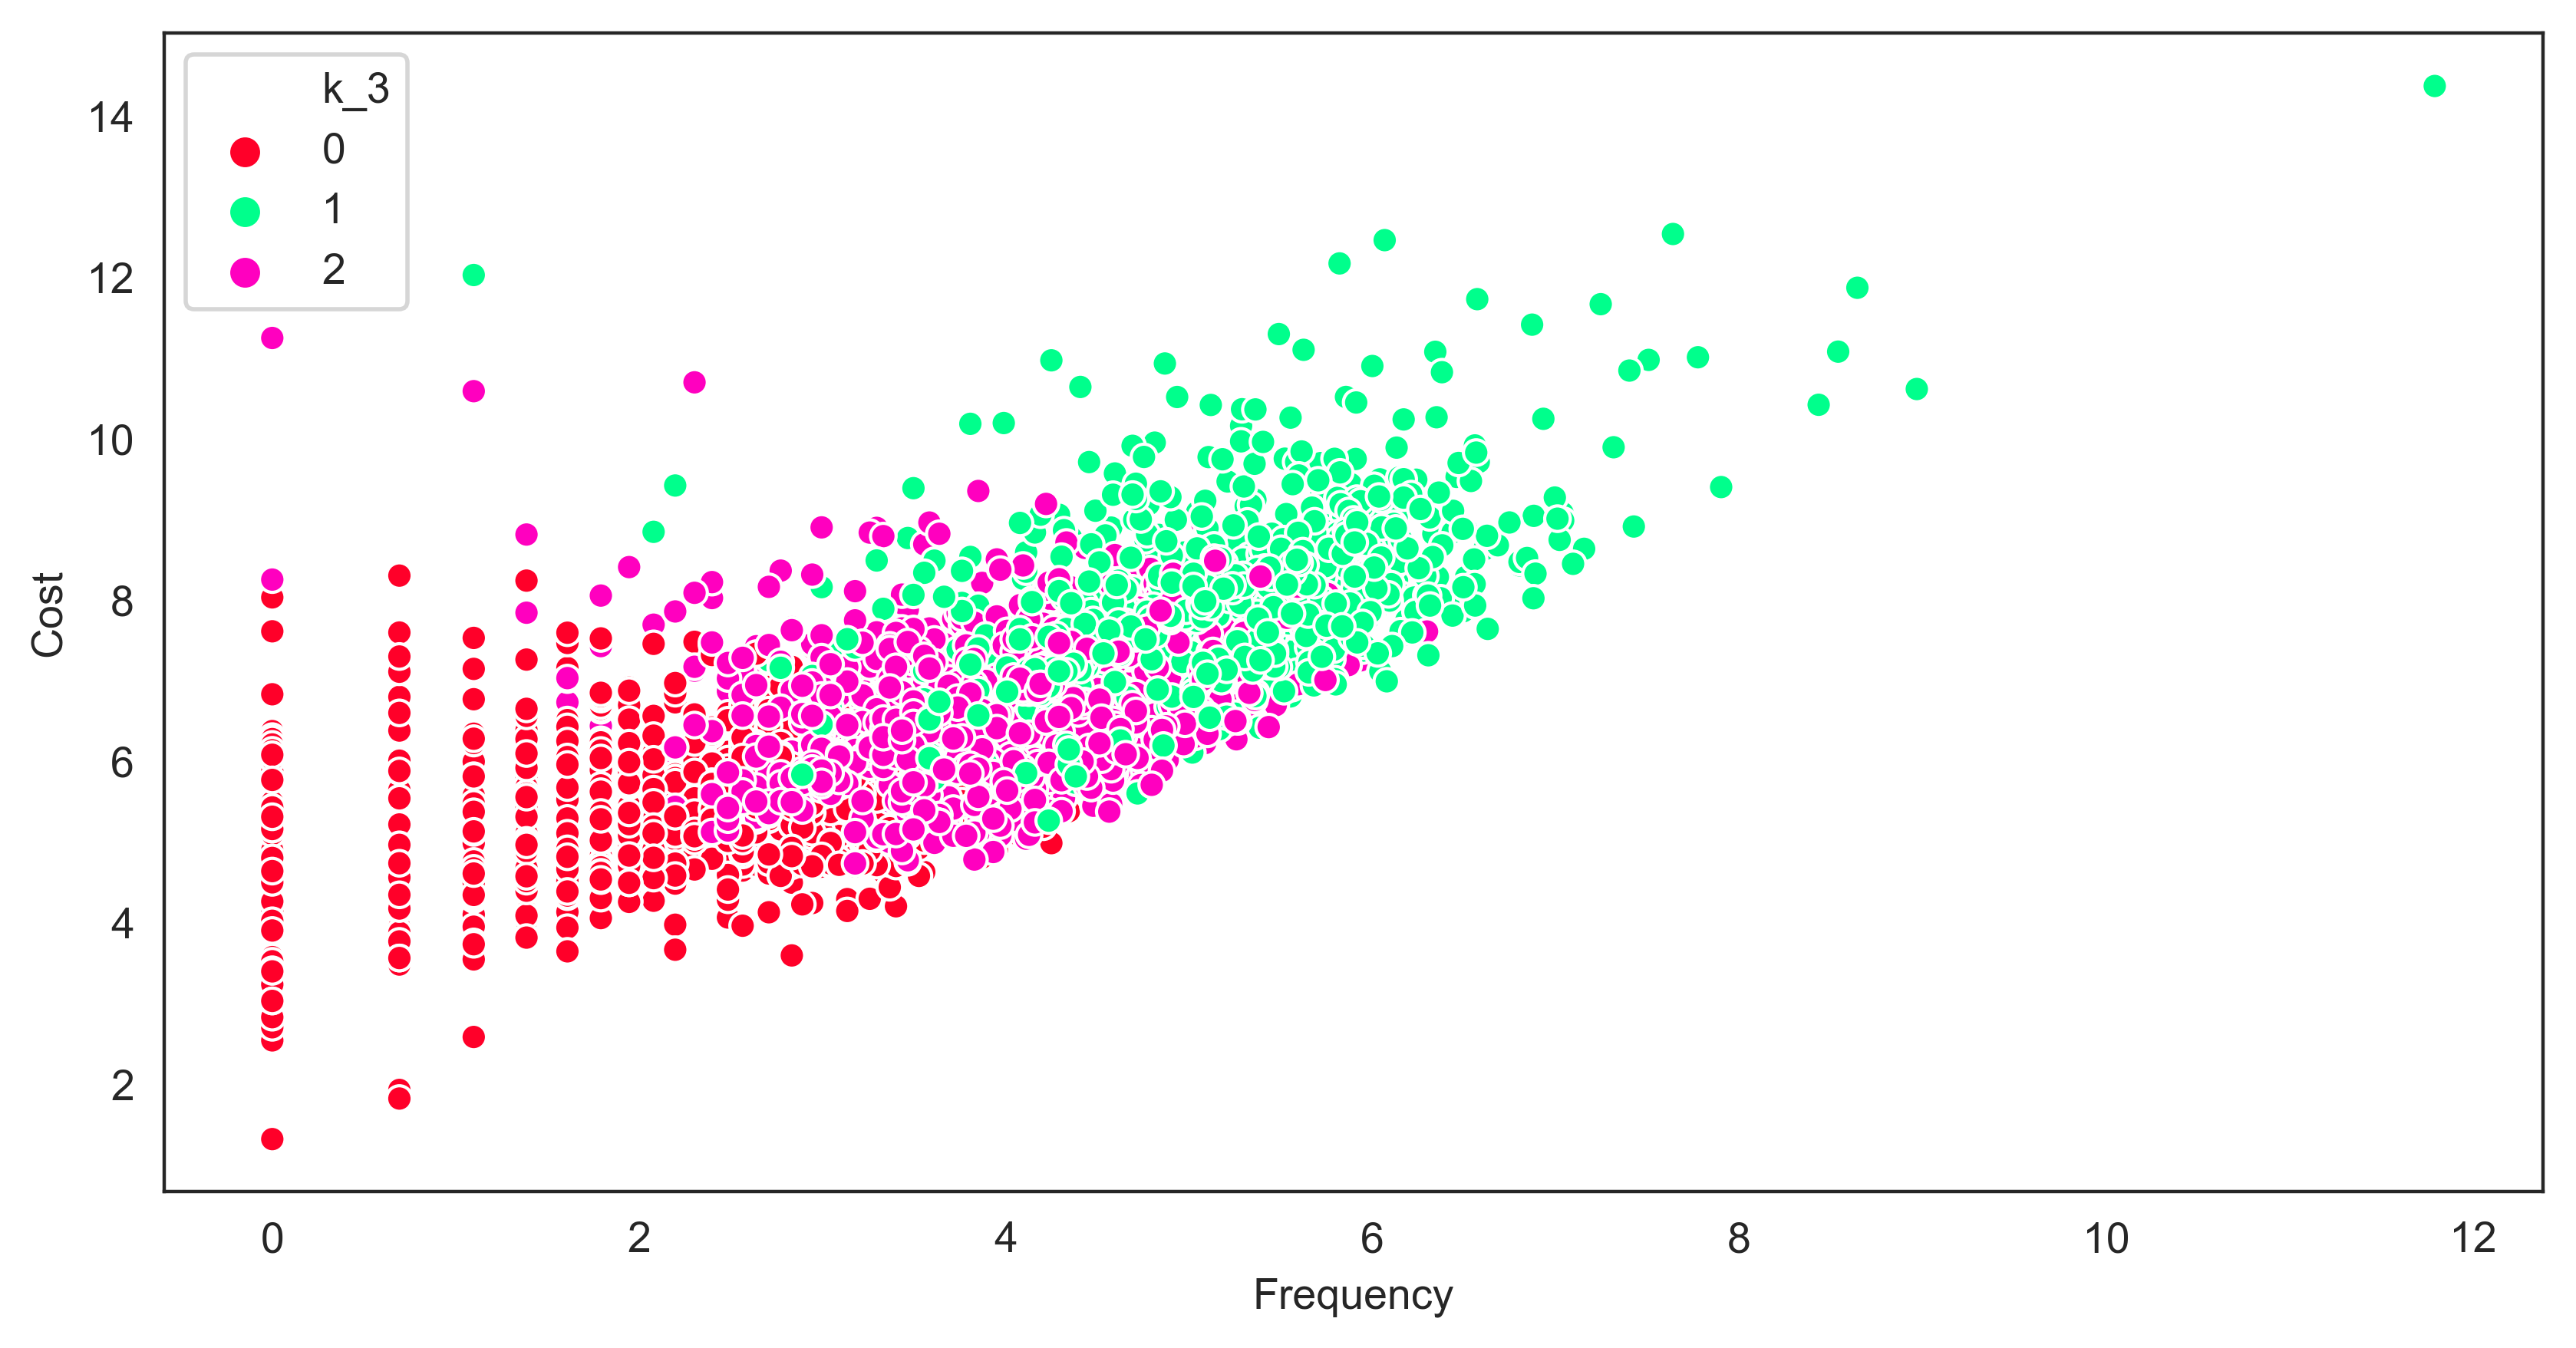

In [40]:
sns.set_style("white")
plt.figure(figsize=(10,5),frameon=True,dpi=200)
sns.scatterplot(x='Frequency', y='Cost',hue='k_3',data=cust_df, palette='gist_rainbow')
print(cust_df.groupby('k_3').agg({'Cost':'median', 'Frequency':'median', 'Recency':'median'}))
plt.xlabel('Frequency')
plt.ylabel('Cost')

         Cost  Frequency   Recency
k_3                               
0    5.463917   2.484907  5.176150
1    7.936506   5.105945  2.197225
2    6.689052   3.951244  3.912023


Text(0, 0.5, 'Cost')

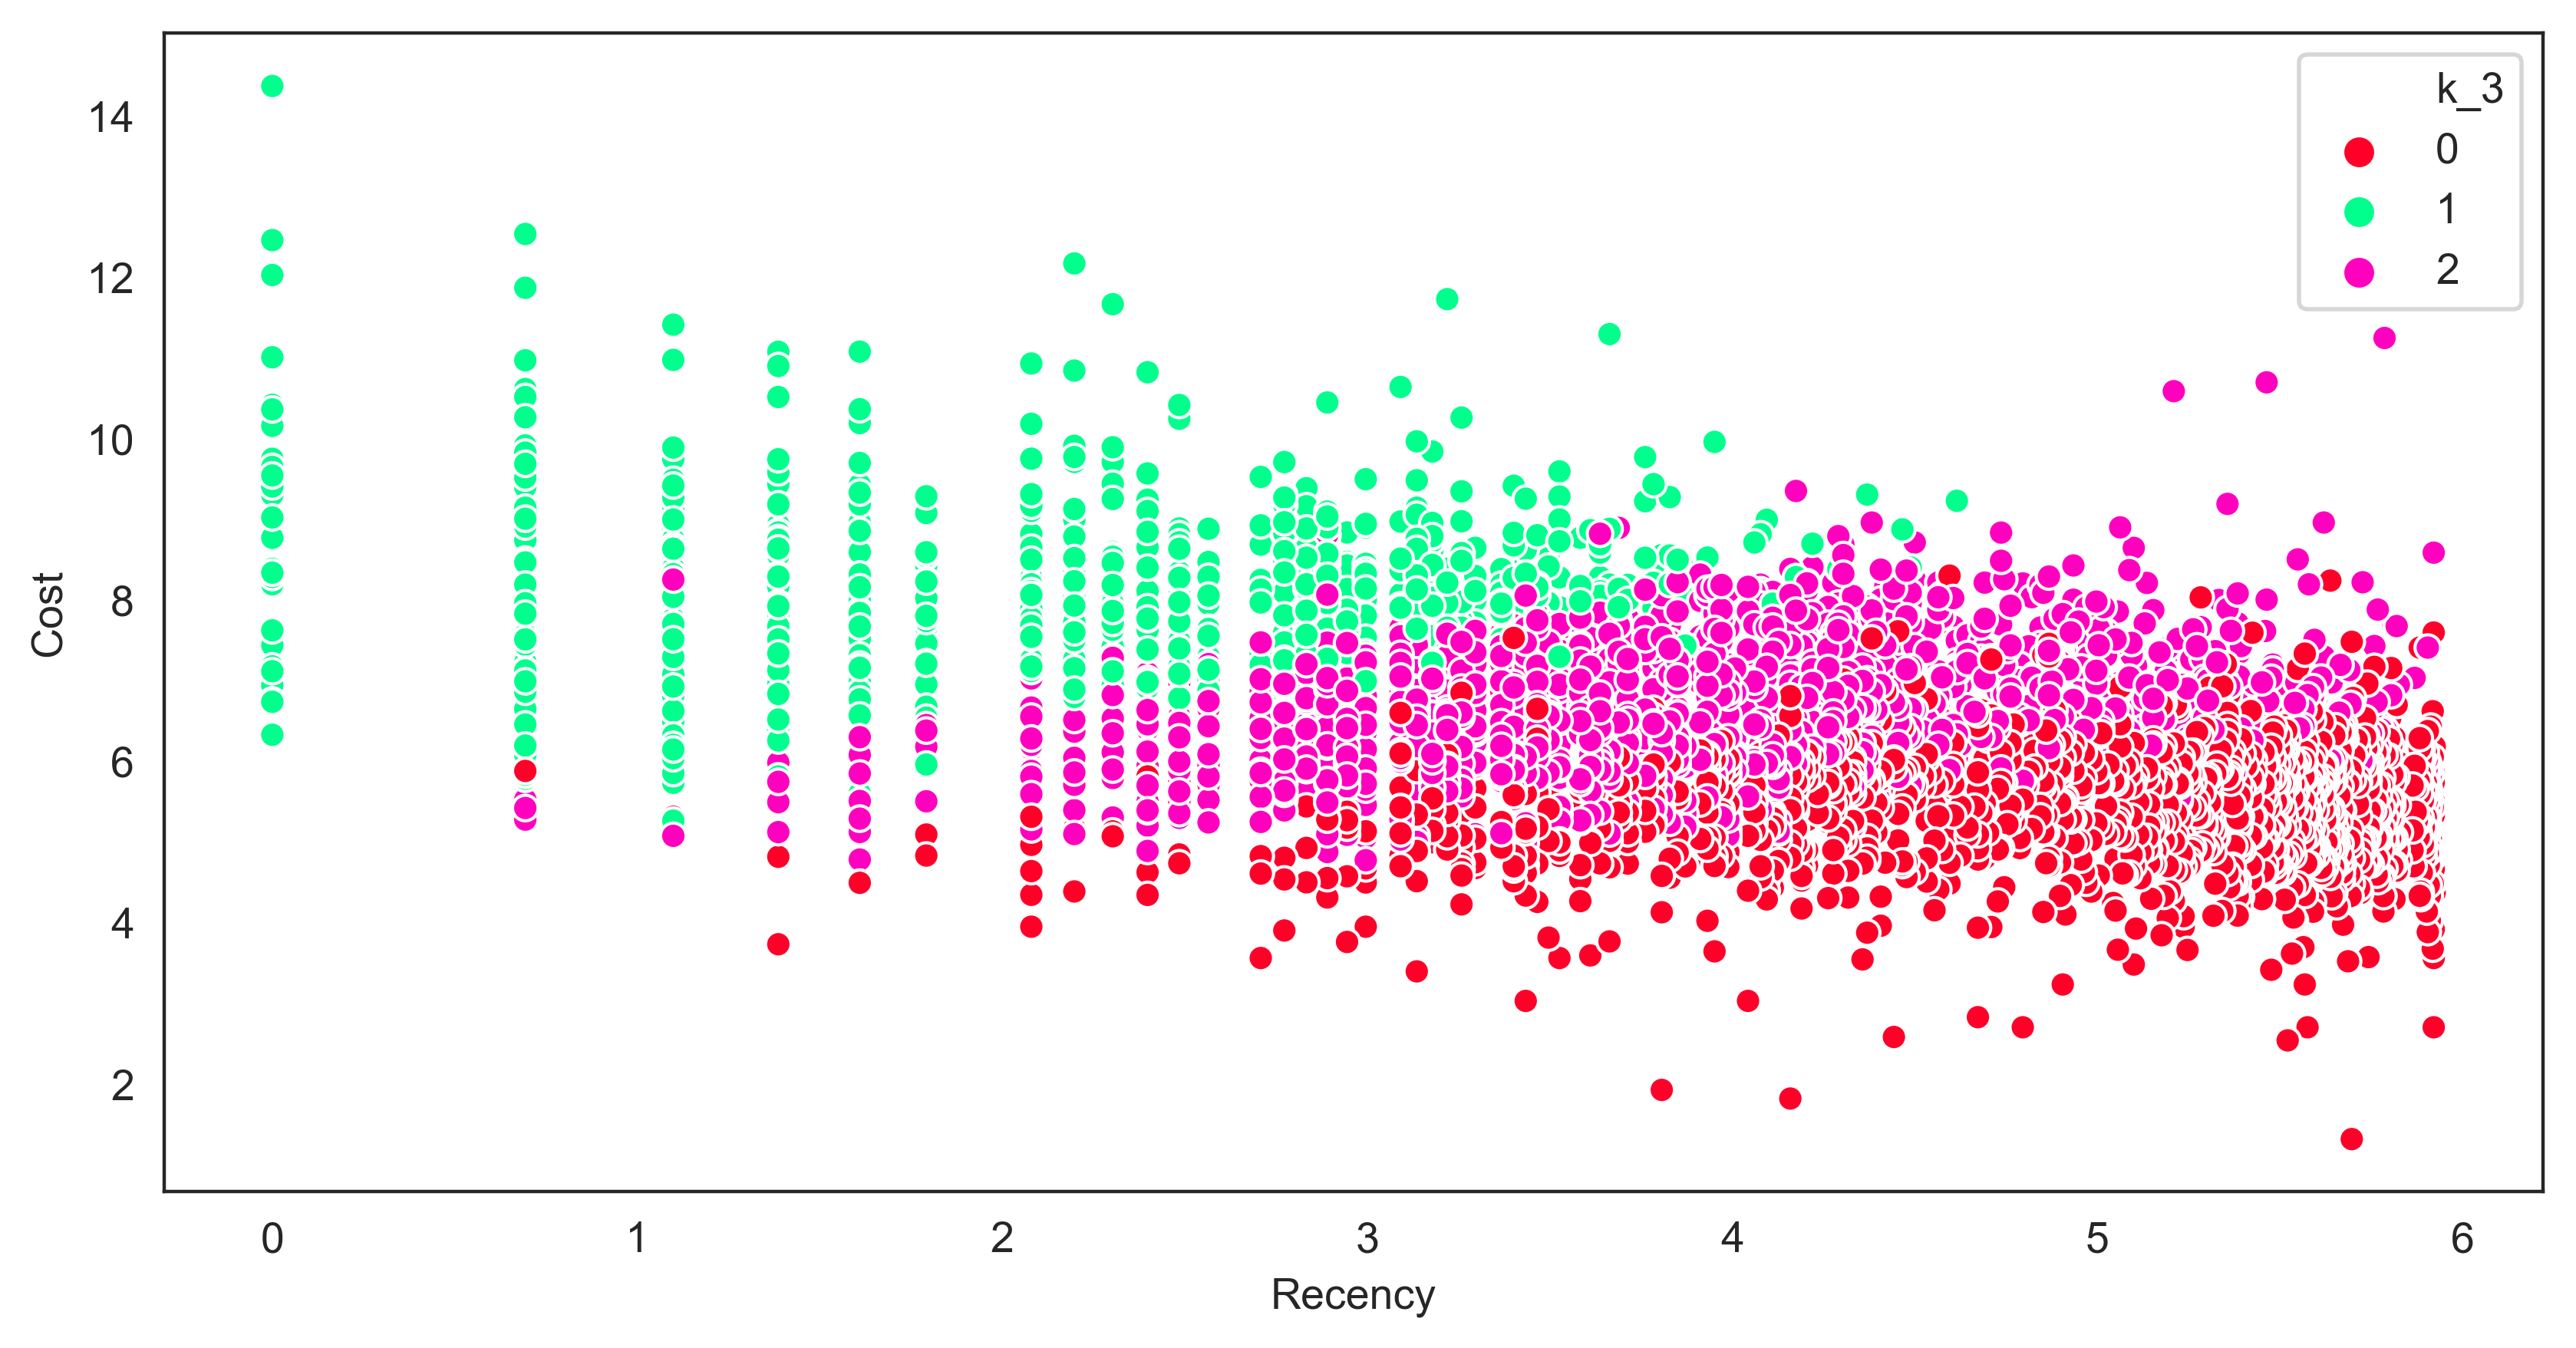

In [41]:
sns.set_style("white")
plt.figure(figsize=(10,5),frameon=True,dpi=200)
sns.scatterplot(x='Recency', y='Cost',hue='k_3',data=cust_df, palette='gist_rainbow')
print(cust_df.groupby('k_3').agg({'Cost':'median', 'Frequency':'median', 'Recency':'median'}))
plt.xlabel('Recency')
plt.ylabel('Cost')


         Cost  Frequency   Recency
k_3                               
0    5.463917   2.484907  5.176150
1    7.936506   5.105945  2.197225
2    6.689052   3.951244  3.912023


Text(0, 0.5, 'Recency')

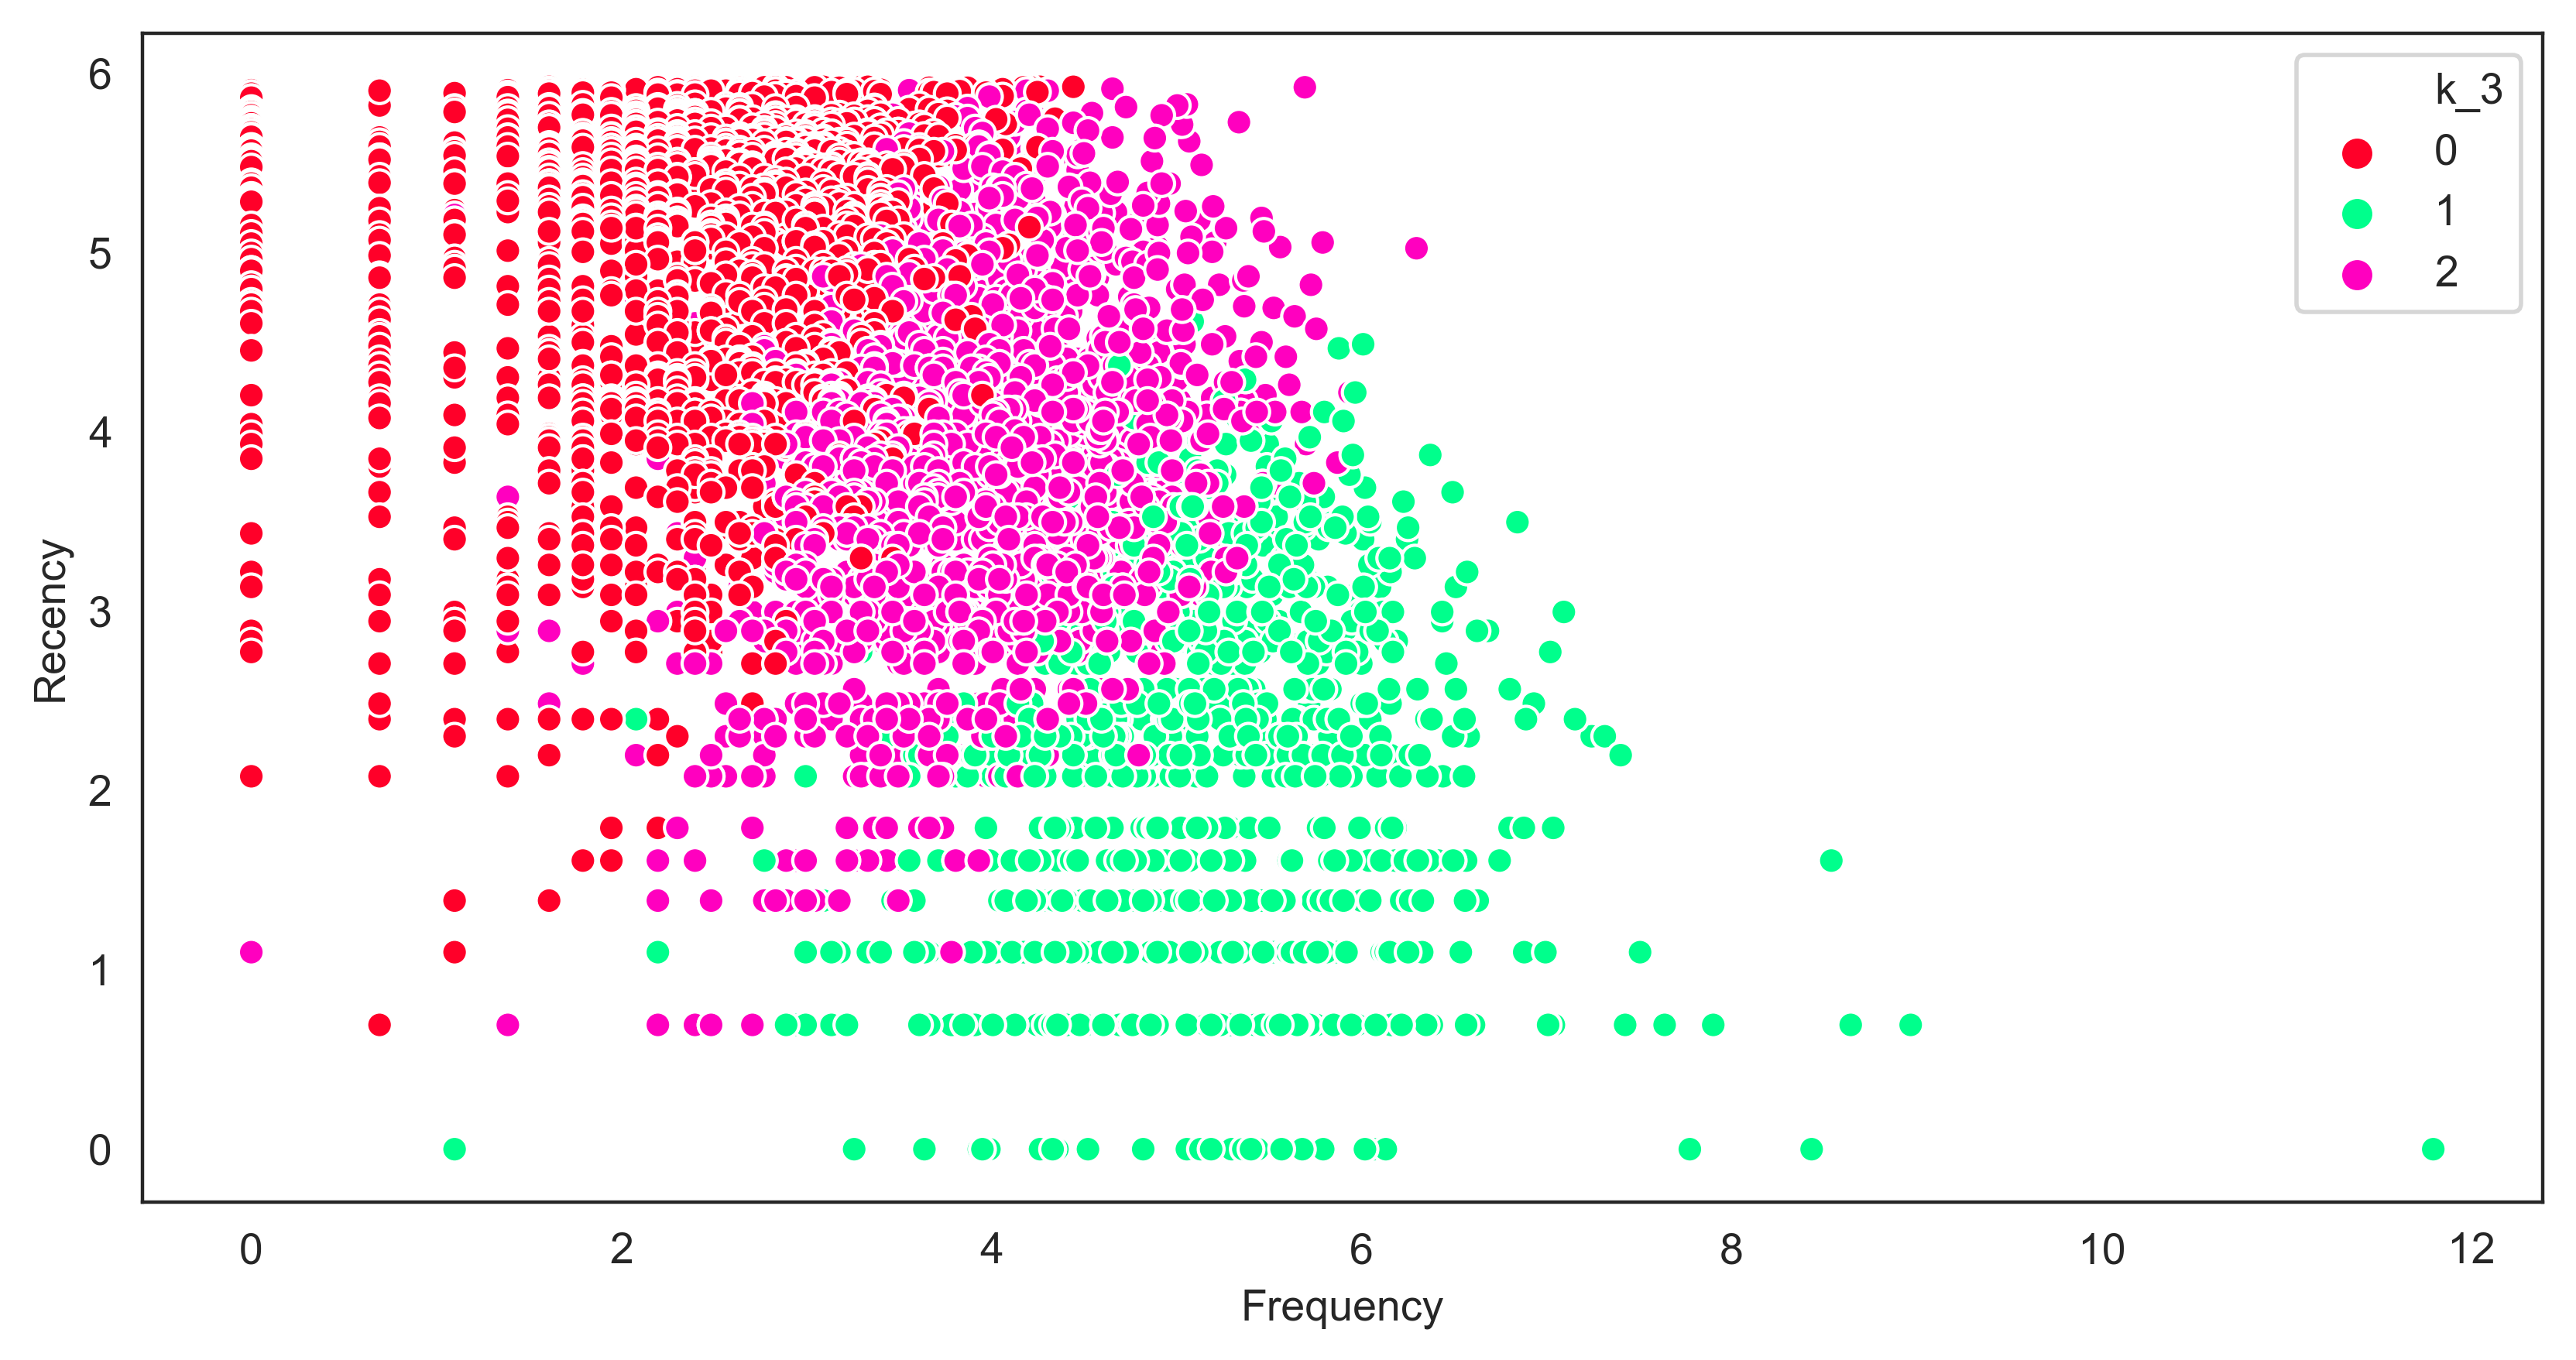

In [42]:
sns.set_style("white")
plt.figure(figsize=(10,5),frameon=True,dpi=200)
sns.scatterplot(x='Frequency', y='Recency',hue='k_3',data=cust_df, palette='gist_rainbow')
print(cust_df.groupby('k_3').agg({'Cost':'median', 'Frequency':'median', 'Recency':'median'}))
plt.xlabel('Frequency')
plt.ylabel('Recency')

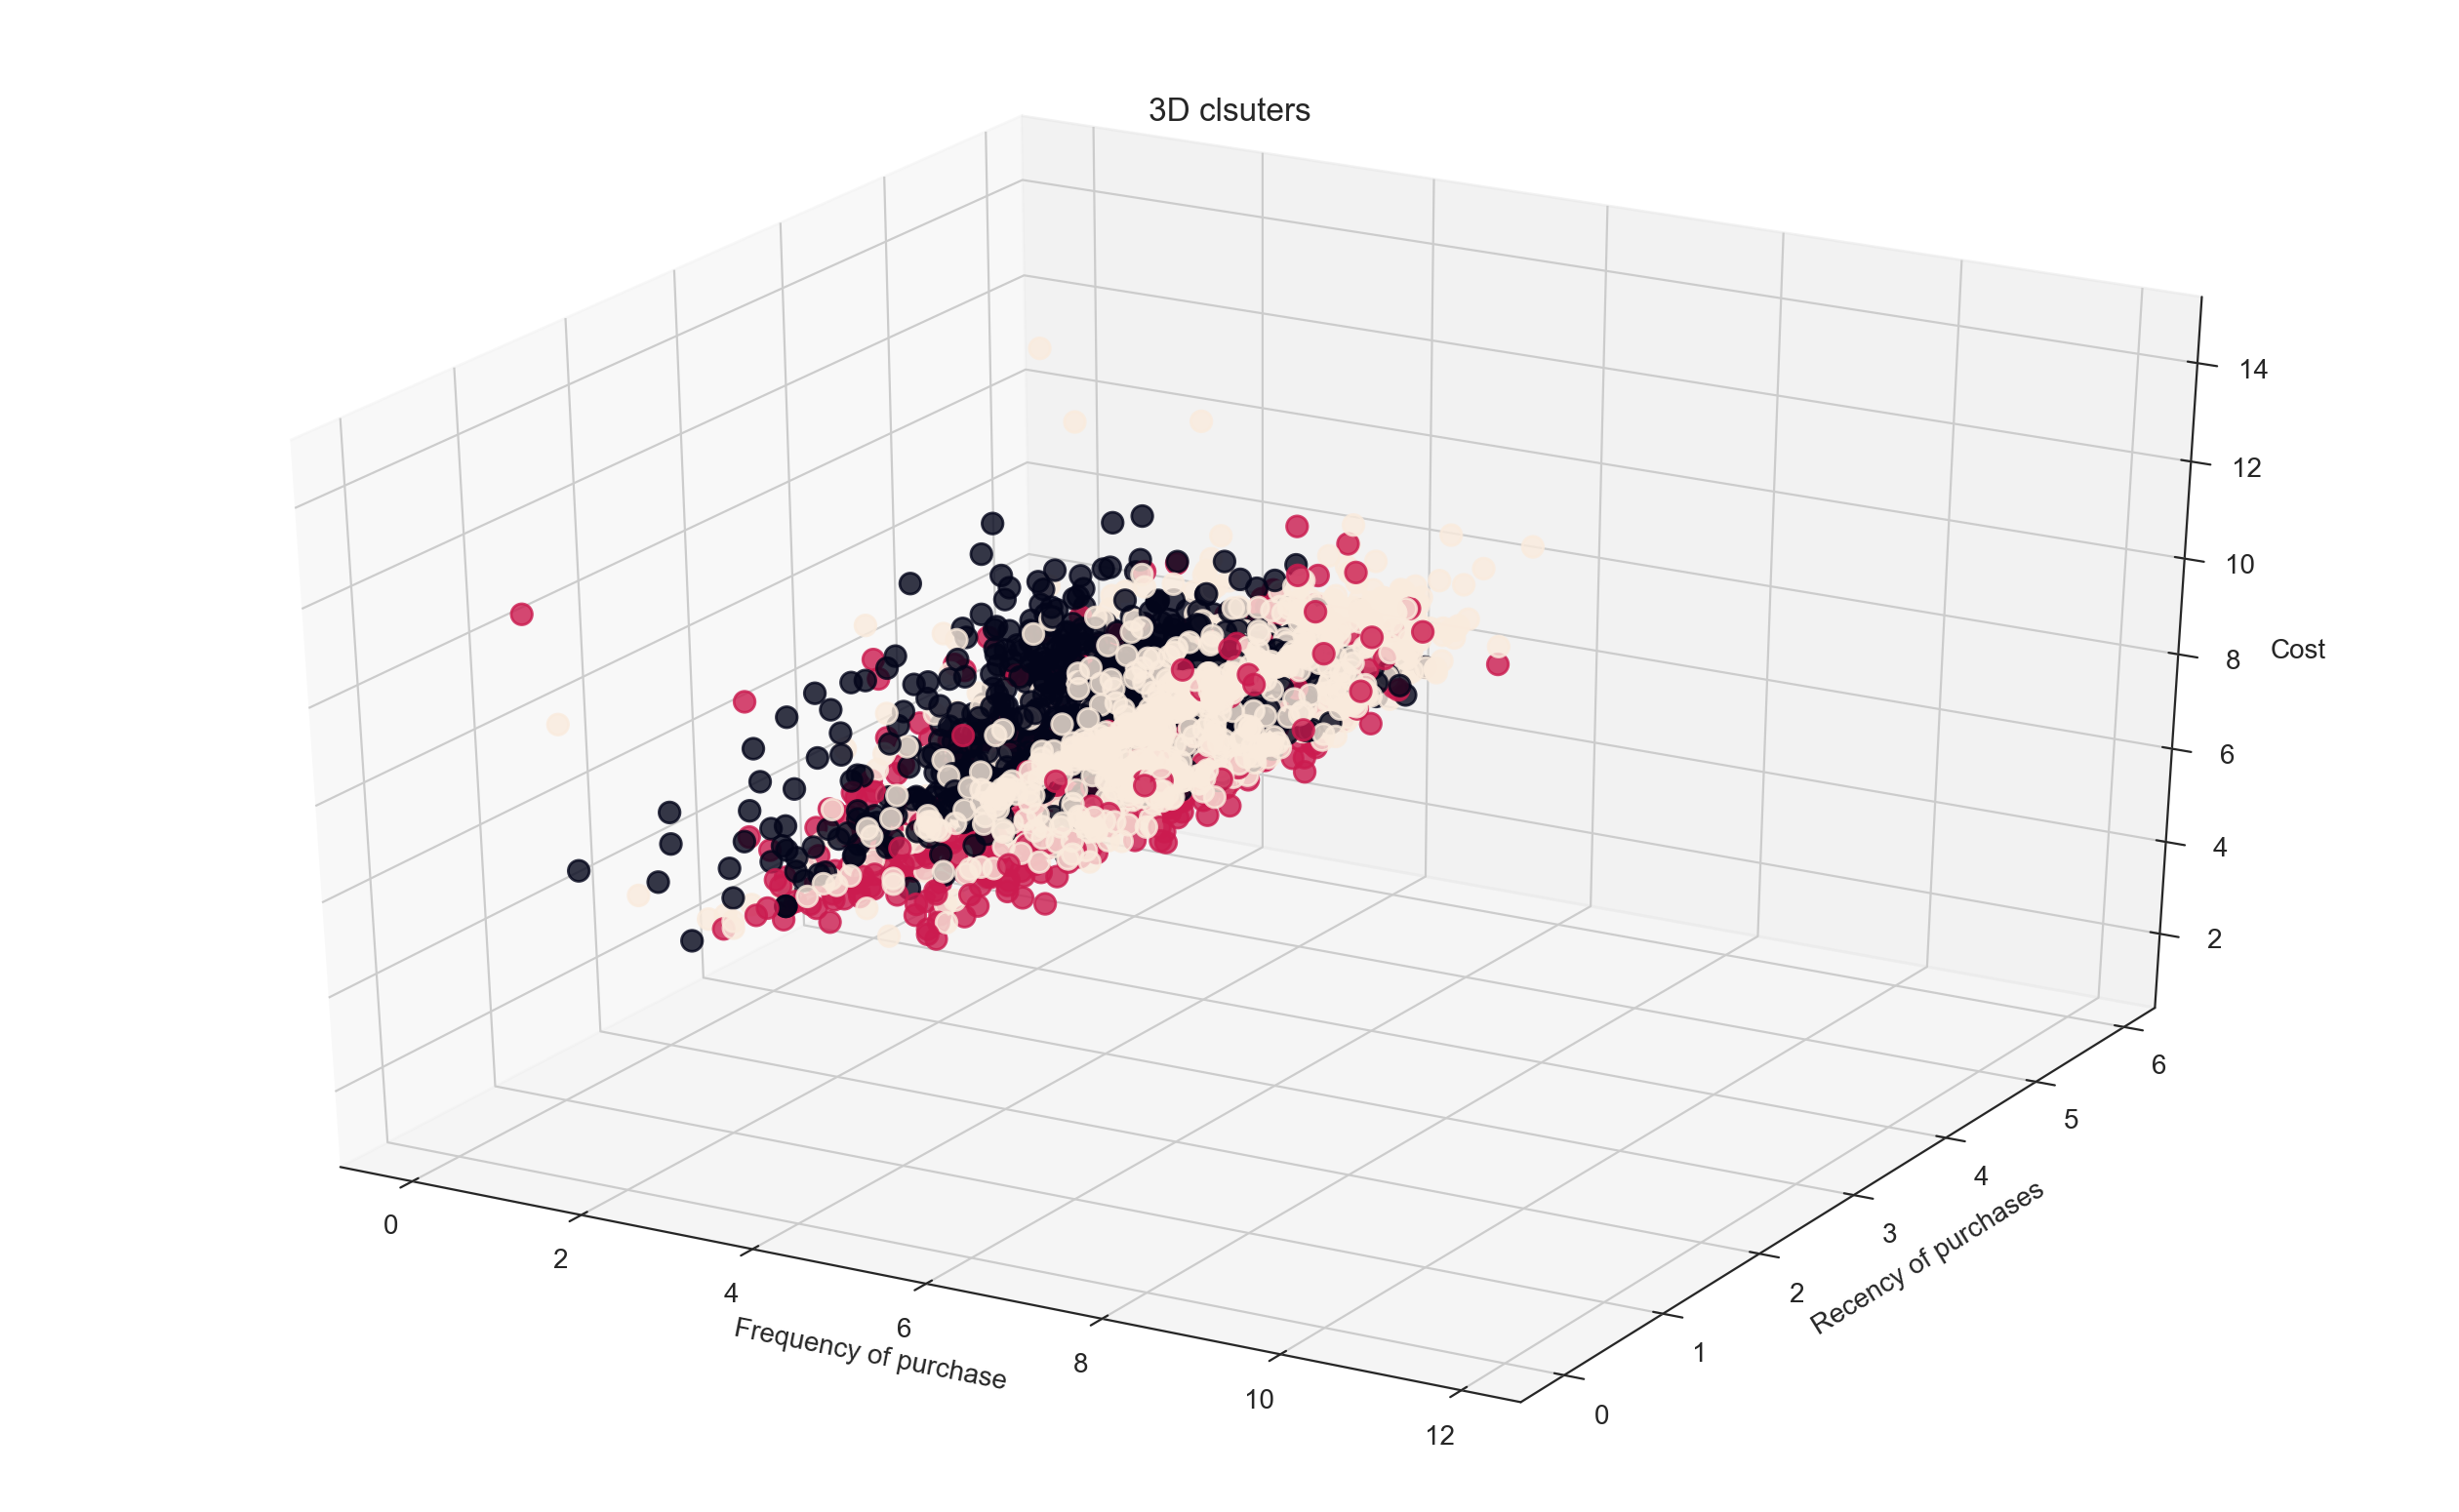

In [43]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(16,10),frameon=True,dpi=100)
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']
ax = fig.add_subplot(111, projection='3d')

x=cust_df.Frequency
y=cust_df.Recency
z=cust_df.Cost
ax.scatter3D(x,y,z,marker="o",c=cust_df.k_3,s=60,alpha=0.8)

ax.set_title("3D clsuters")
ax.set_xlabel("Frequency of purchase")
ax.set_ylabel("Recency of purchases")
ax.set_zlabel("Cost")

plt.show()

In [52]:
import plotly.express as px
fig = px.scatter_3d(cust_df, x='Frequency', y='Recency', z='Cost', color='k_3', symbol='k_3', opacity=0.7,title='3D clusters')
fig.show()